In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

Data Collection and Analysis


In [ ]:
customer_data = pd.read_csv ('/content/Mall_Customers.csv')

In [ ]:
customer_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income column and Spending Score column

In [ ]:
A = customer_data.iloc[:,[3,4]].values

In [ ]:
# Finding within cluster sum of squares value for different number of clustering

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(A)

  wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

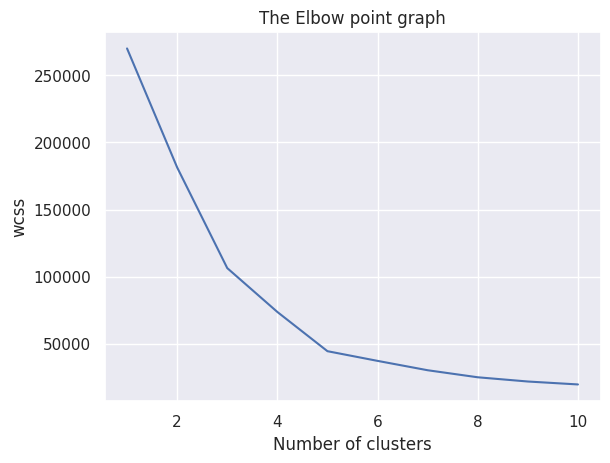

In [ ]:
#plotting an elbow or cut off point graph to which cluster has minimum value
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show

In [ ]:
#optimum number of clusters is 5
#Training the k means clustering model
kmeans = KMeans(n_clusters=5, init= 'k-means++', random_state=0)
#return a label for each data point based on their cluster i.e. each cluster will get a label
Y = kmeans.fit_predict(A) #fit predict will return cluster number for each data point
print(Y)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


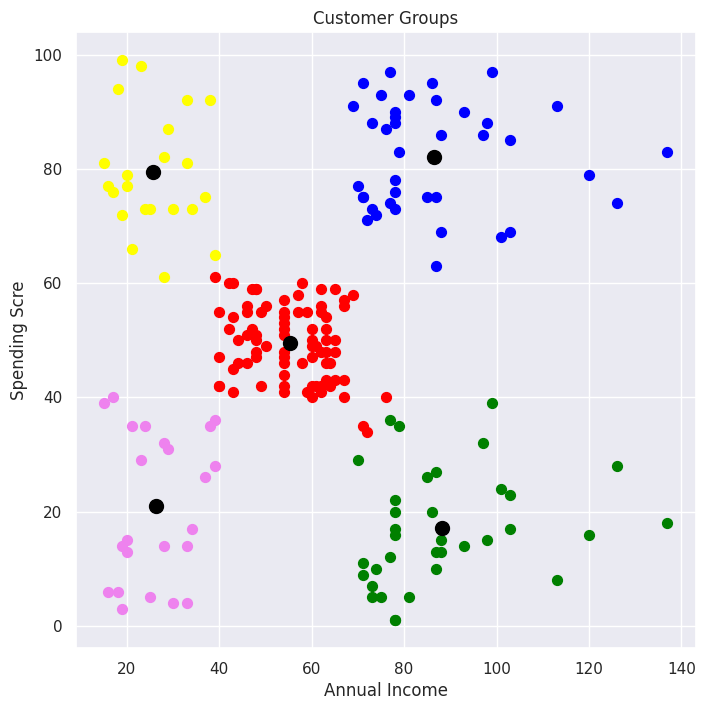

In [ ]:
#Visualizing all the clusters, plotting all the clisters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(A[Y==0,0], A[Y==0,1], s=50, c='green', label ='Cluster 1')
plt.scatter(A[Y==1,0], A[Y==1,1], s=50, c='red', label ='Cluster 2')
plt.scatter(A[Y==2,0], A[Y==2,1], s=50, c='blue', label ='Cluster 3')
plt.scatter(A[Y==3,0], A[Y==3,1], s=50, c='yellow', label ='Cluster 4')
plt.scatter(A[Y==4,0], A[Y==4,1], s=50, c='violet', label ='Cluster 5')

#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroid')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Scre')
plt.show()